## Step 1 - assign appropriate Label to each row of Bow/TF-IDF representation

In [1]:
import numpy as np

authors = np.load("./Data/1.3-bow-authors.npy", allow_pickle=True)
print(authors)
print(authors.shape)
authors2 = np.load("./Data/1.3-tf-idf-authors.npy", allow_pickle=True)
print(authors2)
print(authors2.shape)

if np.array_equal(authors,authors2): #expected. Just to check.
    print("true")


['-Jared' '-Peeter' '-evasian' ... 'zukinzo' 'zzrr' 'zzuil93']
(4994,)
['-Jared' '-Peeter' '-evasian' ... 'zukinzo' 'zzrr' 'zzuil93']
(4994,)
true


In [2]:
from scipy import sparse

X_bow_quantile = sparse.load_npz("./Data/1.4-bow_filtered_quantile.npz")
X_tfidf_quantile = sparse.load_npz("./Data/1.4-tfidf_filtered_quantile.npz")

print(X_bow_quantile.shape)
print(X_tfidf_quantile.shape)

(4994, 53656)
(4994, 53656)


In [3]:
X_bow_svd = np.load("./Data/1.4-bow_svd_reduced.npy")
X_tfidf_svd = np.load("./Data/1.4-tfidf_svd_reduced.npy")

print(X_bow_svd.shape)
print(X_tfidf_svd.shape)

(4994, 1000)
(4994, 1000)


In [4]:
import pandas as pd
Target = pd.read_csv("./Data/target_supervised.csv")

labels = []

for auth in authors:
    # Try to find the first matching row for this author
    match = Target[Target['author'] == auth]

    if not match.empty:
        labels.append(match['gender'].iloc[0])
        #print(match['gender'].iloc[0])
    else:
        print("error")


print(len(labels))
print(labels)

4994
[np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int

## step 2 Perform the train test split for all

In [5]:
from sklearn.model_selection import train_test_split
Y = labels

#split 80-10-10
X_bowsvd_temp, X_bowsvd_test, y_bowsvd_temp, y_bowsvd_test = train_test_split(X_bow_svd,labels, stratify=labels, train_size=0.90,random_state=16)
X_bowsvd_train, X_bowsvd_val, y_bowsvd_train, y_bowsvd_val = train_test_split(X_bowsvd_temp, y_bowsvd_temp, stratify=y_bowsvd_temp, train_size=8/9, random_state=16)

print(X_bowsvd_train.shape)
print(X_bowsvd_val.shape)
print(X_bowsvd_test.shape)

(3994, 1000)
(500, 1000)
(500, 1000)


In [6]:
X_bowquantile_temp, X_bowquantile_test, y_bowquantile_temp, y_bowquantile_test = train_test_split(X_bow_quantile,labels, stratify=labels, train_size=0.90,random_state=16)
X_bowquantile_train, X_bowquantile_val, y_bowquantile_train, y_bowquantile_val = train_test_split(X_bowquantile_temp, y_bowquantile_temp, stratify=y_bowquantile_temp, train_size=8/9, random_state=16)

print(X_bowquantile_train.shape)
print(X_bowquantile_val.shape)
print(X_bowquantile_test.shape)

(3994, 53656)
(500, 53656)
(500, 53656)


In [7]:
#split 80-10-10
X_tfidfsvd_temp, X_tfidfsvd_test, y_tfidfsvd_temp, y_tfidfsvd_test = train_test_split(X_tfidf_svd,labels, stratify=labels, train_size=0.90,random_state=16)
X_tfidfsvd_train, X_tfidfsvd_val, y_tfidfsvd_train, y_tfidfsvd_val = train_test_split(X_tfidfsvd_temp, y_tfidfsvd_temp, stratify=y_tfidfsvd_temp, train_size=8/9, random_state=16)

print(X_tfidfsvd_train.shape)
print(X_tfidfsvd_val.shape)
print(X_tfidfsvd_test.shape)

(3994, 1000)
(500, 1000)
(500, 1000)


In [8]:
X_tfidfquantile_temp, X_tfidfquantile_test, y_tfidfquantile_temp, y_tfidfquantile_test = train_test_split(X_tfidf_quantile,labels, stratify=labels, train_size=0.90,random_state=16)
X_tfidfquantile_train, X_tfidfquantile_val, y_tfidfquantile_train, y_tfidfquantile_val = train_test_split(X_tfidfquantile_temp, y_tfidfquantile_temp, stratify=y_tfidfquantile_temp, train_size=8/9, random_state=16)

print(X_tfidfquantile_train.shape)
print(X_tfidfquantile_val.shape)
print(X_tfidfquantile_test.shape)

(3994, 53656)
(500, 53656)
(500, 53656)


# LOGISTICAL REGRESSION
## ML Model Training and Evaluation.
### a. Choose at least 3 ML methods. Perform model training with the default parameter
configuration, evaluate the performance on both training and test set. Output the
confusion matrix and classification report. Which model generates the best performance?
### b. Do you observe overfitting or under-fitting? If so, why does this happen and how to deal
with this issue?
### c. Tune the hyper-parameters of the models through cross-validation. How does performance
vary? What is your choice of the best model and hyper-parameter according to training
cost (you can use training time as a proxy for “cost”) and performance?

In [9]:
# IMPORT VARI
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


--- BOW SVD : Analysis ---


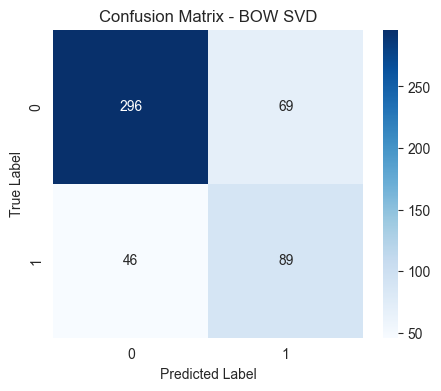

--- TF-IDF SVD : Analysis ---


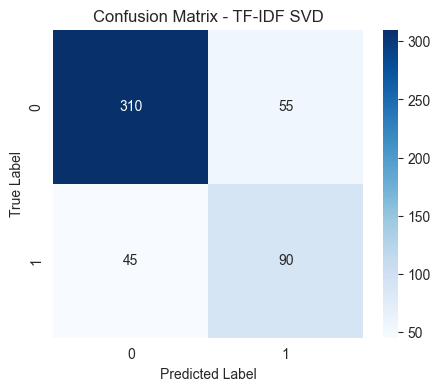

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

def train_and_evaluate(X_train, y_train, X_val, y_val, dataset_name="Dataset"):
    print(f"--- {dataset_name} : Analysis ---")

    # 1. Initialization
    # class_weight='balanced' since there are a lot of men
    model = LogisticRegression(random_state=16, max_iter=2000, class_weight='balanced')

    # 2. Fitting Phase
    model.fit(X_train, y_train)

    # 3. Prediction Phase
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # 4. Debug
    ## print("\nPERFORMANCE - TRAINING SET:")
    ## print(classification_report(y_train, y_pred_train))

    ## print("PERFORMANCE - VALIDATION SET:")
    ## print(classification_report(y_val, y_pred_val))

    # 5. Confusion Matrix (Validation)
    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return model

# Esegui la funzione sul tuo dataset TF-IDF ridotto con SVD (di solito il migliore)
# Nota: assicurati di passare i vettori y corretti
log_reg_model_bow = train_and_evaluate(X_bowsvd_train, y_bowsvd_train, X_bowsvd_val, y_bowsvd_val, "BOW SVD")
log_reg_model_tfidf = train_and_evaluate(X_tfidfsvd_train, y_tfidfsvd_train, X_tfidfsvd_val, y_tfidfsvd_val, "TF-IDF SVD")

### NOTE
Looking at the two plotting of the confusion matrix, we can draw that the tf-idf svd dataset give us better results in terms of TP, TN, FP, FN...

# --- Analisi per: BOW SVD ---

## PERFORMANCE SUL TRAINING SET:
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2916
           1       0.81      0.92      0.86      1078

    accuracy                           0.92      3994
   macro avg       0.89      0.92      0.90      3994
weighted avg       0.93      0.92      0.92      3994

## PERFORMANCE SUL VALIDATION SET:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       365
           1       0.56      0.66      0.61       135

    accuracy                           0.77       500
   macro avg       0.71      0.74      0.72       500
weighted avg       0.78      0.77      0.78       500

### NOTE
In this case we can see that the support demonstrate that there are a lot more men (we knew it) like three times more.
Then, we have to consider that the accuracy of the model drops down when we see the difference 0.92 - 0-77 = 0.15
#### This is Overfitting.

# --- Analisi per: TF-IDF SVD ---

 ## PERFORMANCE SUL TRAINING SET:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      2916
           1       0.71      0.81      0.76      1078

    accuracy                           0.86      3994
   macro avg       0.82      0.84      0.83      3994
weighted avg       0.87      0.86      0.86      3994

## PERFORMANCE SUL VALIDATION SET:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       365
           1       0.62      0.67      0.64       135

    accuracy                           0.80       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.81      0.80      0.80       500
## NOTE
Let's have a look at the data as before... Looking at the difference between accuracy training and validation we get -> 0.86 - 0-80 = 0.06 (better)


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import time
import pandas as pd

# We chose tf-idf model
X_train_tune = X_tfidfsvd_train
y_train_tune = y_tfidfsvd_train
X_val_tune   = X_tfidfsvd_val
y_val_tune   = y_tfidfsvd_val

# 1. Griglia dei parametri
# Dato che l'overfitting è basso, esploriamo anche C più alti (fino a 100) per vedere se
# il modello può imparare qualcosa in più senza perdere generalizzazione.
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', None] # Helping Women
}

print("Start Tuning su TF-IDF SVD...")
start_time = time.time()

# 2. Configuration
grid_search = GridSearchCV(
    LogisticRegression(random_state=16, max_iter=2000, solver='lbfgs'),
    param_grid,
    cv=5,
    scoring='f1_macro', # Ottimizziamo la media tra le due classi
    n_jobs=-1,
    return_train_score=True # Utile per vedere l'overfitting per ogni parametro
)

grid_search.fit(X_train_tune, y_train_tune)

end_time = time.time()
print(f"Tempo totale tuning: {end_time - start_time:.2f} secondi")

# 3. Analisi dei Risultati
print("\nMiglior configurazione:", grid_search.best_params_)
print(f"Miglior F1-Score (Macro CV): {grid_search.best_score_:.4f}")

# Creiamo un DataFrame per un'analisi più comoda
results_df = pd.DataFrame(grid_search.cv_results_)
cols = ['param_C', 'param_class_weight', 'mean_test_score', 'mean_train_score', 'mean_fit_time']
print("\nTop 5 configurazioni: (Tempo) vs (Performaces) ")
print(results_df[cols].sort_values(by='mean_test_score', ascending=False).head(5))

# 4. Validazione Finale
best_model = grid_search.best_estimator_
y_pred_val_opt = best_model.predict(X_val_tune)
print("\n")
print(classification_report(y_val_tune, y_pred_val_opt))

Start Tuning su TF-IDF SVD...
Tempo totale tuning: 12.39 secondi

Miglior configurazione: {'C': 1, 'class_weight': 'balanced'}
Miglior F1-Score (Macro CV): 0.7441

Top 5 configurazioni: (Tempo) vs (Performaces) 
   param_C param_class_weight  mean_test_score  mean_train_score  \
4      1.0           balanced         0.744051          0.828037   
6     10.0           balanced         0.740070          0.833573   
8    100.0           balanced         0.732863          0.860437   
2      0.1           balanced         0.723925          0.810170   
9    100.0               None         0.678762          0.811483   

   mean_fit_time  
4       0.291670  
6       0.584608  
8       1.163664  
2       0.414264  
9       1.352190  


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       365
           1       0.62      0.67      0.64       135

    accuracy                           0.80       500
   macro avg       0.75      0.76      0.75  

Start Tuning su TF-IDF SVD...
Tempo totale tuning: 4.72 secondi

Miglior configurazione: {'C': 1, 'class_weight': 'balanced'}
Miglior F1-Score (Macro CV): 0.7441

Top 5 configurazioni: (Tempo) vs (Performaces)

   param_C param_class_weight  mean_test_score  mean_train_score  \
4      1.0           balanced         0.744051          0.828037
6     10.0           balanced         0.740070          0.833573
8    100.0           balanced         0.732863          0.860437
2      0.1           balanced         0.723925          0.810170
9    100.0               None         0.678762          0.811483

   mean_fit_time
4       0.501710
6       0.724553
8       1.210157
2       0.703173
9       1.348640
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       365
           1       0.62      0.67      0.64       135

    accuracy                           0.80       500
   macro avg       0.75      0.76      0.75       500
weighted avg       0.81      0.80      0.80       500


# CONCLUSIONS
Now, I selected C = 1, with balanced weights because it achieved the highest f1-score on Cross-Validation while also having the lowest computational cost, (training time), making it the most efficient one.

# P.S.

=== FINAL TEST SET PERFORMANCE ===
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       365
           1       0.57      0.58      0.58       135

    accuracy                           0.77       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.77      0.77      0.77       500



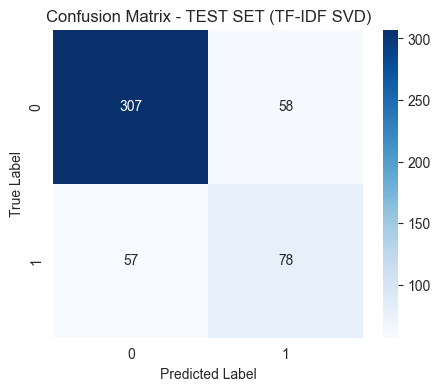

In [12]:
# Final evaluation on TEST set (not validation!)
y_pred_test = best_model.predict(X_tfidfsvd_test)
print("=== FINAL TEST SET PERFORMANCE ===")
print(classification_report(y_tfidfsvd_test, y_pred_test))

# Confusion matrix for test set
cm_test = confusion_matrix(y_tfidfsvd_test, y_pred_test)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TEST SET (TF-IDF SVD)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()